A1. Confusion Matrix & Metrics (Train vs Test)

/tmp/ipython-input-2522250634.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("?", np.nan, inplace=True)


Confusion Matrix – Train Set
[[4738    2]
 [   4   55]]

Classification Report – Train Set:

              precision    recall  f1-score   support

NO CONDITION       1.00      1.00      1.00      4740
           S       0.96      0.93      0.95        59

    accuracy                           1.00      4799
   macro avg       0.98      0.97      0.97      4799
weighted avg       1.00      1.00      1.00      4799

Train Accuracy: 0.9987497395290685


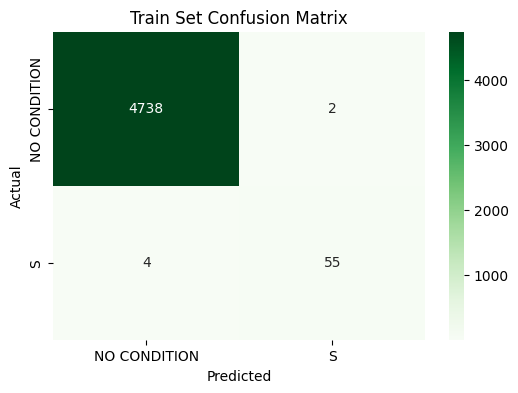


Confusion Matrix – Test Set
[[2031    0]
 [   4   22]]

Classification Report – Test Set:

              precision    recall  f1-score   support

NO CONDITION       1.00      1.00      1.00      2031
           S       1.00      0.85      0.92        26

    accuracy                           1.00      2057
   macro avg       1.00      0.92      0.96      2057
weighted avg       1.00      1.00      1.00      2057

Test Accuracy: 0.9980554205153136


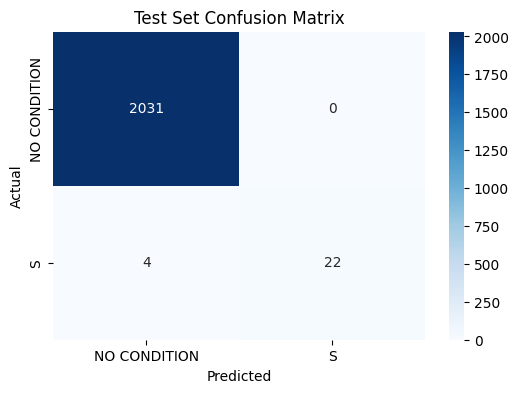

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# -------------------------------
# LOAD & CLEAN DATA
# -------------------------------
file_path = "/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Drop Record ID if present
if "Record ID" in df.columns:
    df.drop(columns=["Record ID"], inplace=True)

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])   # categorical → mode
    else:
        df[col] = df[col].fillna(df[col].median())    # numeric → median

# -------------------------------
# FEATURES & LABELS (binary subset)
# -------------------------------
label_col = "Condition"
unique_classes = df[label_col].unique()
class1, class2 = unique_classes[:2]   # take first 2 classes

binary_df = df[df[label_col].isin([class1, class2])]

X = binary_df.select_dtypes(include=[np.number]).values
y = binary_df[label_col].values

# Split into train and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------
# TRAIN KNN (k=3)
# -------------------------------
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# -------------------------------
# CONFUSION MATRIX – TRAIN SET
# -------------------------------
y_train_pred = knn.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred, labels=[class1, class2])

print("Confusion Matrix – Train Set")
print(cm_train)
print("\nClassification Report – Train Set:\n")
print(classification_report(y_train, y_train_pred, target_names=[class1, class2]))
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens",
            xticklabels=[class1, class2],
            yticklabels=[class1, class2])
plt.title("Train Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------------
# CONFUSION MATRIX – TEST SET
# -------------------------------
y_test_pred = knn.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred, labels=[class1, class2])

print("\nConfusion Matrix – Test Set")
print(cm_test)
print("\nClassification Report – Test Set:\n")
print(classification_report(y_test, y_test_pred, target_names=[class1, class2]))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=[class1, class2],
            yticklabels=[class1, class2])
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


A2.  Regression Error Metrics

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import numpy as np

# Load the dataset
purchase_data = pd.read_csv("/content/drive/MyDrive/ML Datasets/Purchase data.csv")

# Define function for classification
def classify_customers(purchase_df):
    df = purchase_df.copy()

    # Creating labels: RICH (1) if Payment > 200, else POOR (0)
    df['Label'] = df['Payment (Rs)'].apply(lambda x: 1 if x > 200 else 0)
    df['Customer_Category'] = df['Label'].map({1: 'RICH', 0: 'POOR'})

    print("\nCustomer Classification:")
    display(df[['Customer', 'Payment (Rs)', 'Customer_Category']])

    # Features and target
    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
    y = df['Label']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

    # Train Logistic Regression Model
    model = LogisticRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['POOR', 'RICH']))

    # Calculate Regression Metrics (MSE, RMSE, MAPE, R²)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100  # Avoid division by zero
    r2 = r2_score(y_test, y_pred)

    print("\nEvaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R² Score: {r2:.4f}")

    return df[['Customer', 'Payment (Rs)', 'Customer_Category']]

# Run the function
customer_labels = classify_customers(purchase_data)



Customer Classification:


,Customer,Payment (Rs),Customer_Category
0,C_1,386,RICH
1,C_2,289,RICH
2,C_3,393,RICH
3,C_4,110,POOR
4,C_5,280,RICH
5,C_6,167,POOR
6,C_7,271,RICH
7,C_8,274,RICH
8,C_9,148,POOR
9,C_10,198,POOR



Classification Report:
              precision    recall  f1-score   support

        POOR       1.00      1.00      1.00         1
        RICH       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Evaluation Metrics:
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Percentage Error (MAPE): 0.00%
R² Score: 1.0000


A3. Generate 20 data points consisting of 2 features where values vary b/w 1 to 10

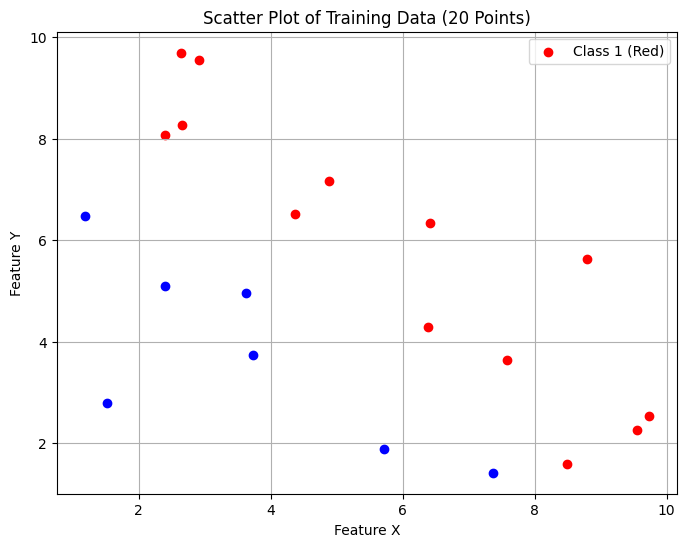

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Generate random training data
# -------------------------------
np.random.seed(42)  # For reproducibility

# Generate 20 data points for features X & Y between 1 and 10
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# -------------------------------
# 2. Assign classes based on a rule (e.g., X + Y > 10 → Class 1 (Red), else Class 0 (Blue))
# -------------------------------
classes = np.where(X + Y > 10, 1, 0)  # Simple linear separation rule

# -------------------------------
# 3. Scatter plot of training data
# -------------------------------
plt.figure(figsize=(8,6))
for i in range(len(X)):
    if classes[i] == 0:
        plt.scatter(X[i], Y[i], color='blue', label='Class 0 (Blue)' if i == 0 else "")
    else:
        plt.scatter(X[i], Y[i], color='red', label='Class 1 (Red)' if i == 0 else "")

plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Scatter Plot of Training Data (20 Points)")
plt.legend()
plt.grid(True)
plt.show()


A4. decision boundary of kNN (k=3) between Class 0 and Class 1 based on training points.

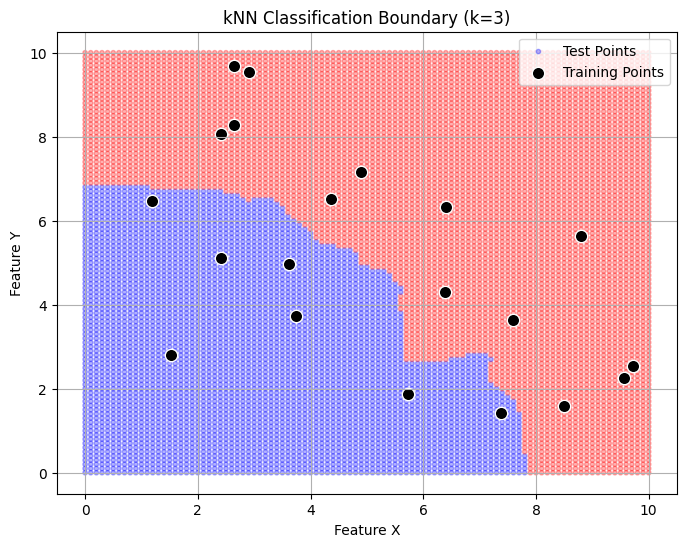

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# -------------------------------
# 1. Generate training data (20 points)
# -------------------------------
np.random.seed(42)  # For reproducibility

X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
train_features = np.column_stack((X_train, Y_train))

# Assign class labels (class 0: Blue, class 1: Red) based on X+Y > 10 rule
y_train = np.where(X_train + Y_train > 10, 1, 0)

# -------------------------------
# 2. Train kNN classifier (k=3)
# -------------------------------
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, y_train)

# -------------------------------
# 3. Generate test set (~10,000 points)
# -------------------------------
x_test_vals = np.arange(0, 10.1, 0.1)
y_test_vals = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test_vals, y_test_vals)  # Grid of points

test_features = np.column_stack((X_test.ravel(), Y_test.ravel()))

# -------------------------------
# 4. Classify test points using kNN
# -------------------------------
y_pred = knn.predict(test_features)

# -------------------------------
# 5. Scatter plot of classified test data
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(test_features[:, 0], test_features[:, 1], c=np.where(y_pred==0, 'blue', 'red'), alpha=0.3, s=10, label='Test Points')

# Overlay training points
for i in range(len(X_train)):
    plt.scatter(X_train[i], Y_train[i], color='black', edgecolor='white', s=80, marker='o', label='Training Points' if i==0 else "")

plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("kNN Classification Boundary (k=3)")
plt.legend()
plt.grid(True)
plt.show()


A5. A4 for diff values of k

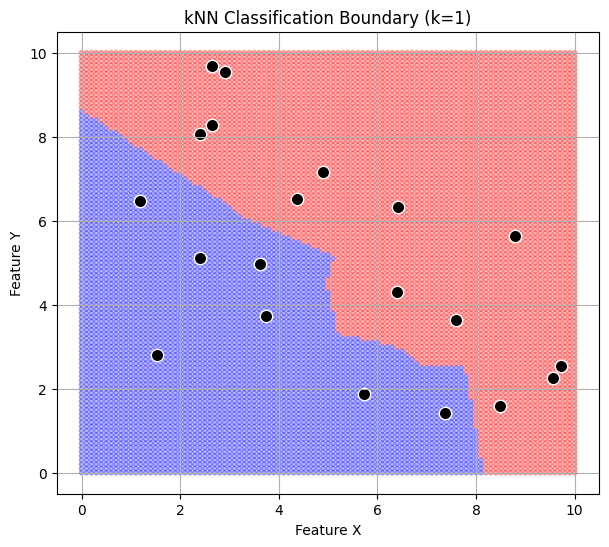

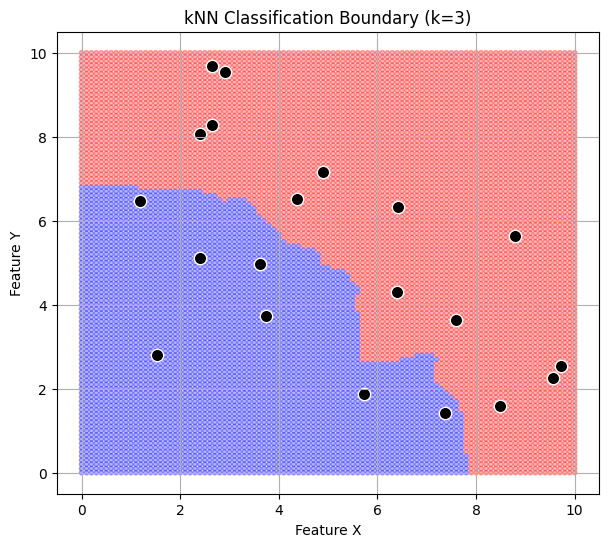

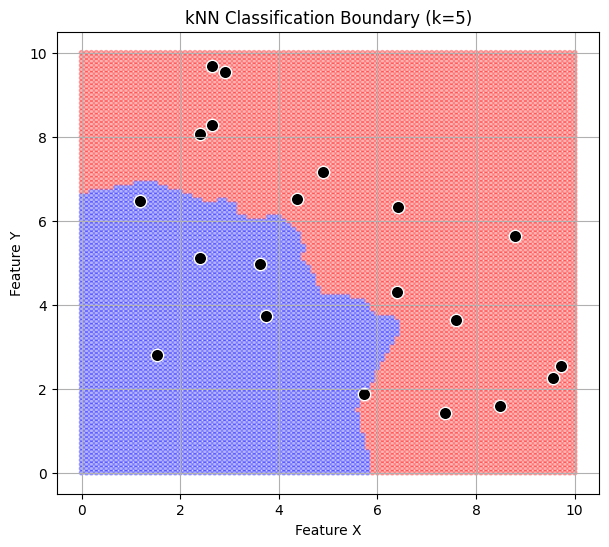

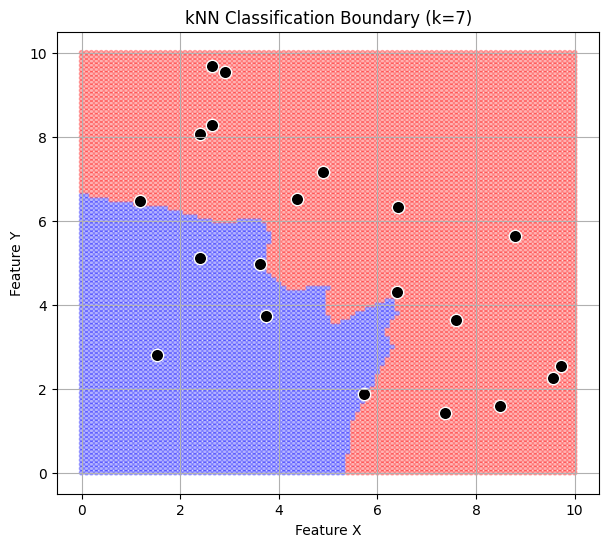

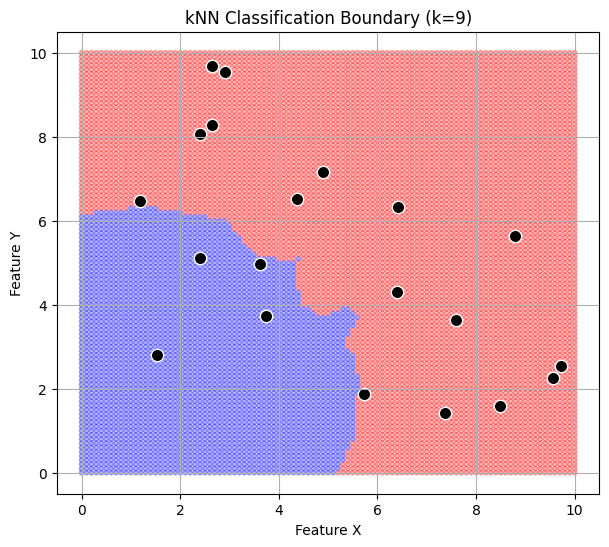

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# -------------------------------
# 1. Generate training data (20 points)
# -------------------------------
np.random.seed(42)  # For reproducibility

X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
train_features = np.column_stack((X_train, Y_train))

# Assign class labels (class 0: Blue, class 1: Red) based on X+Y > 10 rule
y_train = np.where(X_train + Y_train > 10, 1, 0)

# -------------------------------
# 2. Generate test set (~10,000 points)
# -------------------------------
x_test_vals = np.arange(0, 10.1, 0.1)
y_test_vals = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test_vals, y_test_vals)  # Grid of points
test_features = np.column_stack((X_test.ravel(), Y_test.ravel()))

# -------------------------------
# 3. Function to plot classification boundaries
# -------------------------------
def plot_knn_boundary(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, y_train)
    y_pred = knn.predict(test_features)

    plt.figure(figsize=(7, 6))
    plt.scatter(test_features[:, 0], test_features[:, 1],
                c=np.where(y_pred == 0, 'blue', 'red'), alpha=0.3, s=10)

    # Overlay training points
    for i in range(len(X_train)):
        plt.scatter(X_train[i], Y_train[i], color='black', edgecolor='white', s=80, marker='o')

    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title(f"kNN Classification Boundary (k={k})")
    plt.grid(True)
    plt.show()

# -------------------------------
# 4. Plot for various k values
# -------------------------------
for k in [1, 3, 5, 7, 9]:
    plot_knn_boundary(k)


A6. A3 to A5 repetition for any 2 features and classes-kNN Classification with decision boundaries

Unique Classes: ['NO CONDITION' 'S' 'F' 'AK' 'R' 'I' 'M' 'N' 'G' 'K' 'A' 'KJ' 'L' 'MK' 'Q'
 'J' 'C|I' 'O' 'LJ' 'H|K' 'D' 'GK' 'MI' 'P' 'FK' 'B' 'GI' 'C' 'GKJ' 'OI'
 'D|R' 'E']
Selected Features: Index(['Record ID', 'age'], dtype='object')


/tmp/ipython-input-3309729902.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_df.replace("?", np.nan, inplace=True)
/tmp/ipython-input-3309729902.py:34: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  binary_df[col] = pd.to_numeric(binary_df[col], errors="ignore")


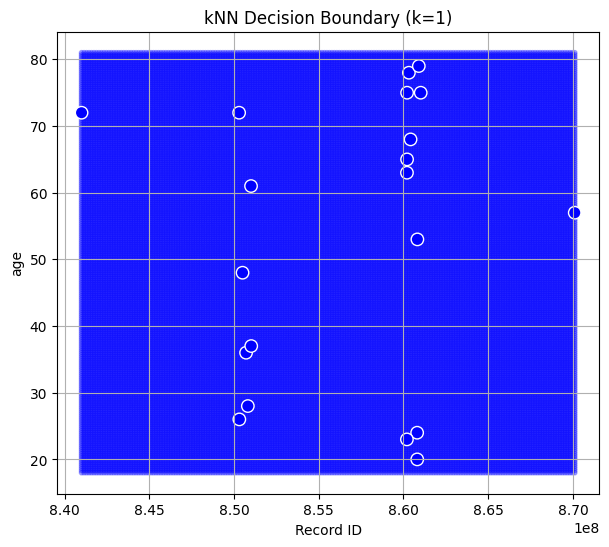

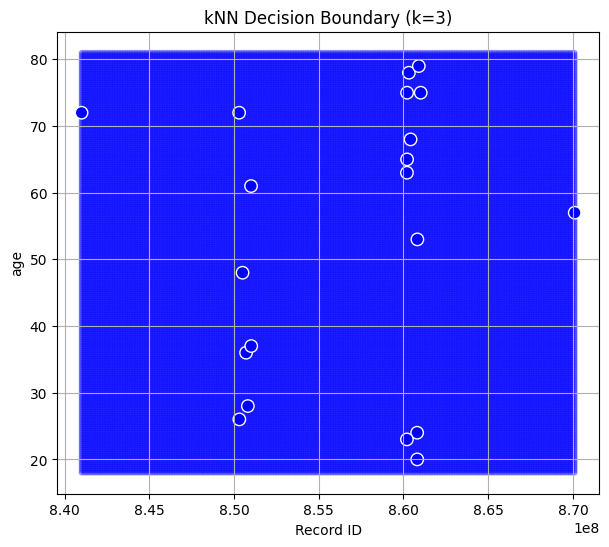

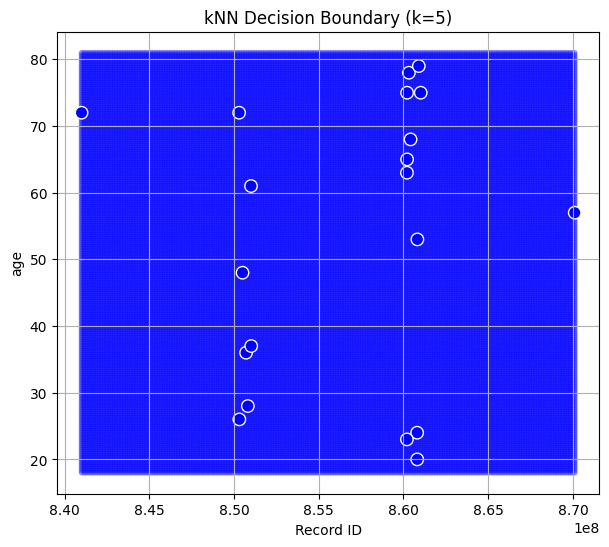

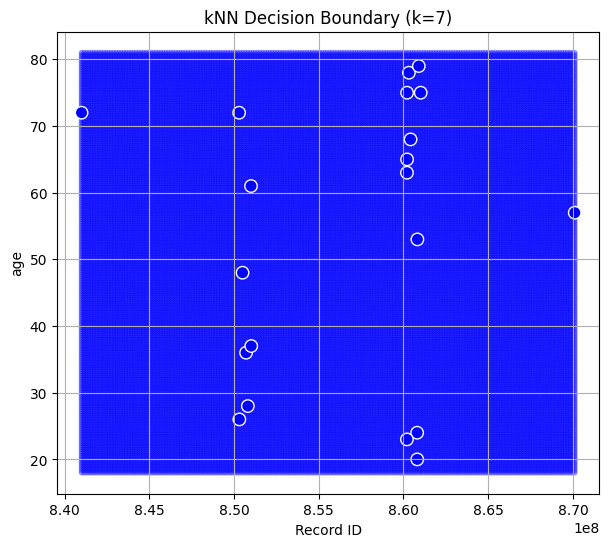

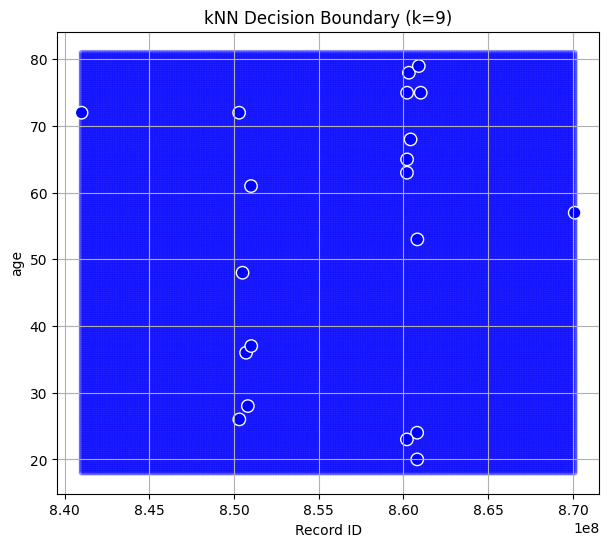

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
file_path = "/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")
# Pick two classes
label_col = 'Condition'
unique_classes = df[label_col].dropna().unique()
print("Unique Classes:", unique_classes)

class1, class2 = unique_classes[0], unique_classes[1]
binary_df = df[df[label_col].isin([class1, class2])].copy()
# Handle missing values
binary_df.replace("?", np.nan, inplace=True)

for col in binary_df.columns:
    if binary_df[col].dtype == "object" and col != label_col:
        binary_df[col] = pd.to_numeric(binary_df[col], errors="ignore")

for col in binary_df.select_dtypes(include=[np.number]).columns:
    binary_df[col] = binary_df[col].fillna(binary_df[col].median())
# Select two numeric features
numeric_features = binary_df.select_dtypes(include=[np.number]).columns[:2]
print("Selected Features:", numeric_features)

X = binary_df[numeric_features].values
y = binary_df[label_col].values
# Randomly sample 20 training points
np.random.seed(42)
sample_indices = np.random.choice(len(X), size=20, replace=False)
X_train = X[sample_indices]
y_train = y[sample_indices]
# Train kNN and plot decision boundary
def plot_knn_boundary(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Create mesh grid within data range
    x_min, x_max = X_train[:, 0].min() - 2, X_train[:, 0].max() + 2
    y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2
    x_vals = np.linspace(x_min, x_max, 200)
    y_vals = np.linspace(y_min, y_max, 200)
    X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
    test_features = np.c_[X_grid.ravel(), Y_grid.ravel()]

    # Predict classes
    y_pred = knn.predict(test_features)

    # Plot decision boundary
    plt.figure(figsize=(7, 6))
    plt.scatter(test_features[:, 0], test_features[:, 1],
                c=np.where(y_pred == class1, 'blue', 'red'),
                alpha=0.3, s=10)
    plt.scatter(X_train[:, 0], X_train[:, 1],
                c=np.where(y_train == class1, 'blue', 'red'),
                edgecolor='white', s=80, marker='o')
    plt.xlabel(numeric_features[0])
    plt.ylabel(numeric_features[1])
    plt.title(f"kNN Decision Boundary (k={k})")
    plt.grid(True)
    plt.show()
# Run for multiple k values
for k in [1, 3, 5, 7, 9]:
    plot_knn_boundary(k)


A7. kNN with Hyperparameter Tuning (Thyroid dataset)

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

file_path = '/content/drive/MyDrive/ML Datasets/Lab Session Data.xlsx'
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# Select label column (Condition) and two classes
label_col = 'Condition'
unique_classes = df[label_col].dropna().unique()
print("Available Classes:", unique_classes)

# Choose first two classes
class1, class2 = unique_classes[0], unique_classes[1]
binary_df = df[df[label_col].isin([class1, class2])].copy()

# Handle missing values
binary_df.replace("?", np.nan, inplace=True)

# Convert object columns to numeric where possible
for col in binary_df.columns:
    if binary_df[col].dtype == "object" and col != label_col:
        binary_df[col] = pd.to_numeric(binary_df[col], errors="ignore")

# Fill missing numeric values with median
for col in binary_df.select_dtypes(include=[np.number]).columns:
    binary_df[col] = binary_df[col].fillna(binary_df[col].median())

# Pick two numeric features
numeric_features = binary_df.select_dtypes(include=[np.number]).columns[:2]
print("Selected Features:", numeric_features)

# Extract features and labels
X = binary_df[numeric_features].values
y = binary_df[label_col].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}  # Try k from 1 to 20
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\nBest k value (GridSearchCV):", grid_search.best_params_['n_neighbors'])
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test_scaled, y_test)
print("Test Accuracy with best k:", test_accuracy)


Available Classes: ['NO CONDITION' 'S' 'F' 'AK' 'R' 'I' 'M' 'N' 'G' 'K' 'A' 'KJ' 'L' 'MK' 'Q'
 'J' 'C|I' 'O' 'LJ' 'H|K' 'D' 'GK' 'MI' 'P' 'FK' 'B' 'GI' 'C' 'GKJ' 'OI'
 'D|R' 'E']
Selected Features: Index(['Record ID', 'age'], dtype='object')


/tmp/ipython-input-2770873254.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_df.replace("?", np.nan, inplace=True)
/tmp/ipython-input-2770873254.py:36: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  binary_df[col] = pd.to_numeric(binary_df[col], errors="ignore")



Best k value (GridSearchCV): 2
Best Cross-validation Accuracy: 0.9877059436913452
Test Accuracy with best k: 0.9859017987360233
